# Определение перспективного тарифа для телеком-компании

Для того, что бы принять стратегию в маркетинге и скорректировать рекламный бюджет компании необходимо понять, какой из тарифов приносит больший доход.
У нас имеется два тарифа которые мы будем сравнивать:


 - Тариф **«Смарт»**
    - Ежемесячная плата: 550 рублей  
    - Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
    - *Стоимость услуг сверх тарифного пакета:*  
     - минута разговора: 3 рубля  
     - сообщение: 3 рубля  
     - 1 Гб интернет-трафика: 200 рублей  

 - Тариф**«Ультра»**  
    - Ежемесячная плата: 1950 рублей  
    - Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
    - *Стоимость услуг сверх тарифного пакета:*  
     - минута разговора: 1 рубль  
     -сообщение: 1 рубль  
     -1 Гб интернет-трафика: 150 рублей   
 
**Примечание:**
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.  
  
В данном проекте, мы проведем подготовку и анализ данных, выясним особенности поведения пользователей имеющихся тарифов. А так же, мы проверим две гипотезы, касающиеся средней выручки:  
 * Равна ли средняя выручка тарифа «Ультра» средне выручки тарифа «Смарт».  
 * Равна ли средняя выручка пользователей из Москвы равна  средней выручке пользователей из других городов.

## Обзор предоставленной информации

In [ ]:
import pandas as pd 
import numpy as np 
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import plotly.io as pio
pio.renderers.default = "png"#импорт библтотек

In [ ]:
data_calls = pd.read_csv('/datasets/calls.csv')#открытие файла
data_calls.head(5)#вывод первых 5 строк
data_calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Таблица `data_calls` (информация о звонках):
 - `id` — уникальный номер звонка
 - `call_date` — дата звонка
 - `duration` — длительность звонка в минутах
 - `user_id` — идентификатор пользователя, сделавшего звонок
<br>Пропущенных значений в данных таблицы `calls` нет.

In [ ]:
data_internet = pd.read_csv('/datasets/internet.csv')#открытие файла
data_internet.head(5)#вывод первых 5 строк
data_internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Таблица `data_internet` (информация об интернет-сессиях):
 - `id` — уникальный номер сессии
 - `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
 - `session_date` — дата интернет-сессии
 - `user_id` — идентификатор пользователя
 <br> Столбец `Unnamed: 0` скорее всего является дублем столбца с индексами и значения для нас не имеет.
 <br> В таблице  149 396 строк, пропусков нет.

In [ ]:
data_messages = pd.read_csv('/datasets/messages.csv')#открытие файла
data_messages.head(5)#вывод первых 5 строк
data_messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Таблица `data_messages` (информация о сообщениях):
 - `id` — уникальный номер сообщения
 - `message_date` — дата сообщения
 - `user_id` — идентификатор пользователя, отправившего сообщение
  <br> В таблице  123 036 строк, пропусков нет.

In [ ]:
data_tariffs = pd.read_csv('/datasets/tariffs.csv')#открытие файла
data_tariffs.head(5)#вывод первых 5 строк
data_tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица `data_tariffs` (информация о тарифах):
 - `tariff_name` — название тарифа
 - `rub_monthly_fee` — ежемесячная абонентская плата в рублях
 - `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
 - `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
 - `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
 - `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
 - `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
 - `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [ ]:
data_users = pd.read_csv('/datasets/users.csv')#открытие файла
data_users.head(5)#вывод первых 5 строк
data_users.info()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Таблица `data_users` (информация о пользователях):
 - `user_id` — уникальный идентификатор пользователя
 - `first_name` — имя пользователя
 - `last_name` — фамилия пользователя
 - `age` — возраст пользователя (годы)
 - `reg_date` — дата подключения тарифа (день, месяц, год)
 - `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
 - `city` — город проживания пользователя
 - `tariff` — название тарифного плана
  <br> В таблице  предоставлена о пятистах пользователей интересующих нас тарифов

В таблицах представленна информация о пятистах пользователях тарифов **«Смарт»** и **«Ультра»**, а так же совершенных ими звонках, смс и использовании интернет-трафике. 
<br> На первый взгляд, предоставленные данные довольно понятны. Каких-либо критических замечаний не замечено. Перейдем к подготовке данных для дальнейшего анализа.

## Подготовка данных

В таблице `data_calls`, в столбце с датами тип данных обозначен как `str`. Для того, что бы в дальнейшем мы могли использовать этот столбец для анализа приведем его в типу `datetime64`. Так же, по условиям нашего оператора мобильной связи, каждый звонок округляется до минут в большую сторону. Поэтому, округлим значения в столбце `'duration'` до большего целого.

In [ ]:
data_calls['call_date'] = pd.to_datetime(
    data_calls['call_date'], format='%Y-%m-%d'
)#изменение типа данных столбца с данными
data_calls['duration'] = np.ceil(data_calls['duration'])
#округление секунд по звонкам до целых минут по условию тарифного плана

data_calls.head(5)
data_calls.info()


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,3.00,1000
3,1000_3,2018-09-21,14.00,1000
4,1000_4,2018-12-15,6.00,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


Минимально время звонка заняло 0 мин, скорее всего это был *'недозвон'* или *'сброс звонка'*.  
<br> Для дальнейшего анализа нам пригодится столбец с месяцами, в которые были совершены звонки.

In [ ]:
data_calls['month'] = pd.DatetimeIndex(data_calls['call_date']).month 
#добавление столбца с месяцем

data_calls = data_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum', 'count'])
#Создание сводной таблицы
data_calls.columns = list(map("_".join, data_calls.columns))
#объединени двухуровнего наименования столбцов
data_calls.head(10)

sum_duration  count_duration
user_id month                              
1000    5            159.00              22
        6            172.00              43
        7            340.00              47
        8            408.00              52
        9            466.00              58
        10           350.00              57
        11           338.00              43
        12           333.00              46
1001    11           430.00              59
        12           414.00              63

С помощью сводной таблицы, мы выделили количество и время звонков, которые совершил каждый пользователь в разные месяцы.
<br> Обработаем таблицу с интернет-трафиком:
<br>Заменим тип данных с датами на `datetime64` для того, чтобы можно было отдельно выделить из даты месяц и создадим отдельный столбец с месяцами.
<br>С помощью сводной таблицы выведем сумму использованного трафика для каждого пользователя по месяцам, а так же количество интернет-сессий. Т.к. количество использованного трафика округляется на конец месяца до целого **Гб** в большую сторону, создадим столбец, в котором будут значения с использованным трафиком в **Гигабайтах**.

In [ ]:
data_internet['session_date'] = pd.to_datetime(
    data_internet['session_date'], format='%Y-%m-%d'
)#изменение типа данных столбца с данными
data_internet['month'] = pd.DatetimeIndex(data_internet['session_date']).month 
#создание столбца с месяцем
data_internet = data_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['sum', 'count'])
#Создание сводной таблицы
data_internet.columns = list(map("_".join, data_internet.columns))
#объединени двухуровнего наименования столбцов
data_internet['gb_used'] = data_internet['sum_mb_used'] / 1024 
#Перевод Мб в Гб
data_internet['gb_used'] = np.ceil(data_internet['gb_used'])
#округление

data_internet.info()
data_internet.head(5)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3203 entries, (1000, 5) to (1499, 12)
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sum_mb_used    3203 non-null   float64
 1   count_mb_used  3203 non-null   int64  
 2   gb_used        3203 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 88.5 KB


sum_mb_used  count_mb_used  gb_used
user_id month                                     
1000    5         2,253.49              5     3.00
        6        23,233.77             49    23.00
        7        14,003.64             29    14.00
        8        14,055.93             29    14.00
        9        14,568.91             27    15.00

У нас получилась таблица с двойным индексом по ID пользователя и номером месяца. 
<br> Обработаем так же табличку с *SMS-сообщениями*.

In [ ]:
data_messages['message_date'] = pd.to_datetime(
    data_messages['message_date'], format='%Y-%m-%d'
)#изменение типа данных столбца с данными
data_messages['month'] = pd.DatetimeIndex(data_messages['message_date']).month
#создание столбца с месяцем
data_messages = data_messages.pivot_table(index=['user_id', 'month'], values='message_date', aggfunc='count')
#Создание сводной таблицы
data_messages = data_messages.rename (columns= {'message_date': 'count_message'})
#переименование столбца
data_messages.head(10)


count_message
user_id month               
1000    5                 22
        6                 60
        7                 75
        8                 81
        9                 57
        10                73
        11                58
        12                70
1002    6                  4
        7                 11

Приступим теперь к табличке с данными о клиентах. В столбце `user_id` изменим тип данных. По умолчанию он `str`, но для того, что бы можно было в дальнейшем объединить таблицы по ID необходимо привести столбец к типу `int`.

In [ ]:
data_users['user_id'] = data_users['user_id'].astype(int)#изменение типа данных
data_users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Приступим к объединению таблиц при помощи метода `merge`.

In [ ]:

data_revenue = (data_calls
                .merge(data_internet, on=['user_id','month'], how='outer')
                .merge(data_messages, on=['user_id','month'], how='outer').reset_index()
)# создание объединеного датасета (основной таблицы)
data_revenue = data_revenue.drop('sum_mb_used', 1)#удаление ненужного столбца
data_revenue = pd.merge(
    data_revenue, data_users[['tariff','city','user_id','age']], 
        how='outer', on='user_id'
)#присоединение информации о пользователях
data_revenue = data_revenue.rename(
    columns= {'count_mb_used': 'count_interne_sessions','tariff':'tariff_name'}
)#переименование столбцов

data_revenue.head(5)

,user_id,month,sum_duration,count_duration,count_interne_sessions,gb_used,count_message,tariff_name,city,age
0,1000,5.00,159.00,22.00,5.00,3.00,22.00,ultra,Краснодар,52
1,1000,6.00,172.00,43.00,49.00,23.00,60.00,ultra,Краснодар,52
2,1000,7.00,340.00,47.00,29.00,14.00,75.00,ultra,Краснодар,52
3,1000,8.00,408.00,52.00,29.00,14.00,81.00,ultra,Краснодар,52
4,1000,9.00,466.00,58.00,27.00,15.00,57.00,ultra,Краснодар,52


Мы объединили столбцы с информацией об использовании услуг оператора. Теперь нам необходимо добавить информацию о самих тарифах. Переведем информацию о Мегабайтах включенных в тариф в Гигабайты.

In [ ]:
data_tariffs['mb_per_month_included'] = data_tariffs['mb_per_month_included'] /1024
#перевод Мб в ГБ в таблице
data_tariffs = data_tariffs.rename(columns= {'mb_per_month_included': 'gb_per_month_included'})
#переименование столбца
data_revenue = data_revenue.merge(data_tariffs, on='tariff_name', how='outer')
#добавление информации о тарифных планах в основную таблицу
data_revenue.head(10)   

,user_id,month,sum_duration,count_duration,count_interne_sessions,gb_used,count_message,tariff_name,city,age,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.00,159.00,22.00,5.00,3.00,22.00,ultra,Краснодар,52,1000,30.00,3000,1950,150,1,1
1,1000,6.00,172.00,43.00,49.00,23.00,60.00,ultra,Краснодар,52,1000,30.00,3000,1950,150,1,1
2,1000,7.00,340.00,47.00,29.00,14.00,75.00,ultra,Краснодар,52,1000,30.00,3000,1950,150,1,1
3,1000,8.00,408.00,52.00,29.00,14.00,81.00,ultra,Краснодар,52,1000,30.00,3000,1950,150,1,1
4,1000,9.00,466.00,58.00,27.00,15.00,57.00,ultra,Краснодар,52,1000,30.00,3000,1950,150,1,1
5,1000,10.00,350.00,57.00,27.00,15.00,73.00,ultra,Краснодар,52,1000,30.00,3000,1950,150,1,1
6,1000,11.00,338.00,43.00,24.00,15.00,58.00,ultra,Краснодар,52,1000,30.00,3000,1950,150,1,1
7,1000,12.00,333.00,46.00,21.00,10.00,70.00,ultra,Краснодар,52,1000,30.00,3000,1950,150,1,1
8,1003,8.00,380.00,55.00,15.00,9.00,37.00,ultra,Москва,23,1000,30.00,3000,1950,150,1,1
9,1003,9.00,961.00,134.00,22.00,13.00,91.00,ultra,Москва,23,1000,30.00,3000,1950,150,1,1


Мы объединили данные всех таблиц в единый датасет. Найдем `Nan`в основной таблице.

In [ ]:
data_revenue.isna().sum()#вывод количества Nan
data_revenue.info()

user_id                     0
month                       2
sum_duration               42
count_duration             42
count_interne_sessions     13
gb_used                    13
count_message             499
tariff_name                 0
city                        0
age                         0
messages_included           0
gb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 3216 non-null   int64  
 1   month                   3214 non-null   float64
 2   sum_duration            3174 non-null   float64
 3   count_duration          3174 non-null   float64
 4   count_interne_sessions  3203 non-null   float64
 5   gb_used                 3203 non-null   float64
 6   count_message           2717 non-null   float64
 7   tariff_name             3216 non-null   object 
 8   city                    3216 non-null   object 
 9   age                     3216 non-null   int64  
 10  messages_included       3216 non-null   int64  
 11  gb_per_month_included   3216 non-null   float64
 12  minutes_included        3216 non-null   int64  
 13  rub_monthly_fee         3216 non-null   int64  
 14  rub_per_gb              3216 non-null   

Все значения `Nan` в таблице мы можем заменить на 0, так это означает, что зонков, смс или использования интернета не было. Но значения `Nan` в столбце с месяцами заменить нельзя.

In [ ]:
data_revenue[data_revenue['month'].isna()] #вывод строк со значениями месяцев Nan

,user_id,month,sum_duration,count_duration,count_interne_sessions,gb_used,count_message,tariff_name,city,age,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
985,1128,NaN,NaN,NaN,NaN,NaN,NaN,ultra,Волжский,51,1000,30.00,3000,1950,150,1,1
3215,1371,NaN,NaN,NaN,NaN,NaN,NaN,smart,Омск,50,50,15.00,500,550,200,3,3


Таких строк всего две, поэтому мы их просто удалим. Удаление не должно сказаться на данных.

In [ ]:
data_revenue.dropna(subset=['month'], inplace=True)#удаление строк с пропущенными месяцами
data_revenue = data_revenue.fillna(0)#Замена значений Nan в таблице
data_revenue['gb_used'] = data_revenue['gb_used'].astype('int')
data_revenue['sum_duration'] = data_revenue['sum_duration'].astype('int')
data_revenue['month'] = data_revenue['month'].astype('int')
data_revenue['count_duration'] = data_revenue['count_duration'].astype('int')
data_revenue['count_message'] = data_revenue['count_message'].astype('int')
data_revenue['gb_per_month_included'] = data_revenue['gb_per_month_included'].astype('int')
data_revenue['count_interne_sessions'] = data_revenue['count_interne_sessions'].astype('int')
#изменение типа данных минут на int

data_revenue.isna().sum()
data_revenue.info()

user_id                   0
month                     0
sum_duration              0
count_duration            0
count_interne_sessions    0
gb_used                   0
count_message             0
tariff_name               0
city                      0
age                       0
messages_included         0
gb_per_month_included     0
minutes_included          0
rub_monthly_fee           0
rub_per_gb                0
rub_per_message           0
rub_per_minute            0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3214
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   user_id                 3214 non-null   int64 
 1   month                   3214 non-null   int64 
 2   sum_duration            3214 non-null   int64 
 3   count_duration          3214 non-null   int64 
 4   count_interne_sessions  3214 non-null   int64 
 5   gb_used                 3214 non-null   int64 
 6   count_message           3214 non-null   int64 
 7   tariff_name             3214 non-null   object
 8   city                    3214 non-null   object
 9   age                     3214 non-null   int64 
 10  messages_included       3214 non-null   int64 
 11  gb_per_month_included   3214 non-null   int64 
 12  minutes_included        3214 non-null   int64 
 13  rub_monthly_fee         3214 non-null   int64 
 14  rub_per_gb              3214 non-null   int64 
 15  rub_

Мы произвели замену `Nan`-ов. Теперь нам надо узнать, сколько стоили минуты, СМС и Гб, которые были использованы сверх лимита, а так же полную сумму оплаты связи по месяцам для каждого абонента. Для этого создадим новые столбцы с помощью функций.

In [ ]:
def over_duration(row):#создаие функции
      
    over_min = 0
    minutes = row['sum_duration']
    minutes_limit = row['minutes_included']
    rub_per_minute = row['rub_per_minute']
    
    if minutes > minutes_limit:
        over_min += (minutes - minutes_limit) * rub_per_minute
    if minutes < minutes_limit:
        over_min = 0
        
    return over_min
data_revenue['over_min'] = data_revenue.apply(over_duration, axis=1)#вызов функции

def over_sms(row):#создаие функции
      
    over_sms = 0
    sms = row['count_message']
    sms_limit = row['messages_included']
    rub_per_message = row['rub_per_message']
    
    if sms > sms_limit:
        over_sms += (sms - sms_limit) * rub_per_message
    if sms < sms_limit:
        over_sms = 0
        
    return over_sms
data_revenue['over_sms'] = data_revenue.apply(over_sms, axis=1)#вызов функции

def over_gb(row):#создаие функции
      
    over_gb = 0
    traffic = row['gb_used']
    gb_limit = row['gb_per_month_included']
    rub_per_gb = row['rub_per_gb']
    
    if traffic > gb_limit:
        over_gb += (traffic - gb_limit) * rub_per_gb
    if traffic < gb_limit:
        over_gb = 0
        
    return over_gb
data_revenue['over_gb'] = data_revenue.apply(over_gb, axis=1)#вызов функции

data_revenue.head(10)

,user_id,month,sum_duration,count_duration,count_interne_sessions,gb_used,count_message,tariff_name,city,age,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_min,over_sms,over_gb
0,1000,5,159,22,5,3,22,ultra,Краснодар,52,1000,30,3000,1950,150,1,1,0,0,0
1,1000,6,172,43,49,23,60,ultra,Краснодар,52,1000,30,3000,1950,150,1,1,0,0,0
2,1000,7,340,47,29,14,75,ultra,Краснодар,52,1000,30,3000,1950,150,1,1,0,0,0
3,1000,8,408,52,29,14,81,ultra,Краснодар,52,1000,30,3000,1950,150,1,1,0,0,0
4,1000,9,466,58,27,15,57,ultra,Краснодар,52,1000,30,3000,1950,150,1,1,0,0,0
5,1000,10,350,57,27,15,73,ultra,Краснодар,52,1000,30,3000,1950,150,1,1,0,0,0
6,1000,11,338,43,24,15,58,ultra,Краснодар,52,1000,30,3000,1950,150,1,1,0,0,0
7,1000,12,333,46,21,10,70,ultra,Краснодар,52,1000,30,3000,1950,150,1,1,0,0,0
8,1003,8,380,55,15,9,37,ultra,Москва,23,1000,30,3000,1950,150,1,1,0,0,0
9,1003,9,961,134,22,13,91,ultra,Москва,23,1000,30,3000,1950,150,1,1,0,0,0


Мы создали 3 новых столбца с суммами затрат абонентов на услуги сверх тарифных лимитов. Теперь создадим столбец `total_price` с суммой всех затрат клиентов.

In [ ]:
data_revenue['total_price'] = (data_revenue['over_sms'] + data_revenue['over_gb'] + 
                               data_revenue['over_min'] + data_revenue['rub_monthly_fee']
)#создание нового столбца с итоговой суммой
data_revenue.head(10)

,user_id,month,sum_duration,count_duration,count_interne_sessions,gb_used,count_message,tariff_name,city,age,...,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,over_min,over_sms,over_gb,total_price
0,1000,5,159,22,5,3,22,ultra,Краснодар,52,...,30,3000,1950,150,1,1,0,0,0,1950
1,1000,6,172,43,49,23,60,ultra,Краснодар,52,...,30,3000,1950,150,1,1,0,0,0,1950
2,1000,7,340,47,29,14,75,ultra,Краснодар,52,...,30,3000,1950,150,1,1,0,0,0,1950
3,1000,8,408,52,29,14,81,ultra,Краснодар,52,...,30,3000,1950,150,1,1,0,0,0,1950
4,1000,9,466,58,27,15,57,ultra,Краснодар,52,...,30,3000,1950,150,1,1,0,0,0,1950
5,1000,10,350,57,27,15,73,ultra,Краснодар,52,...,30,3000,1950,150,1,1,0,0,0,1950
6,1000,11,338,43,24,15,58,ultra,Краснодар,52,...,30,3000,1950,150,1,1,0,0,0,1950
7,1000,12,333,46,21,10,70,ultra,Краснодар,52,...,30,3000,1950,150,1,1,0,0,0,1950
8,1003,8,380,55,15,9,37,ultra,Москва,23,...,30,3000,1950,150,1,1,0,0,0,1950
9,1003,9,961,134,22,13,91,ultra,Москва,23,...,30,3000,1950,150,1,1,0,0,0,1950


Мы создали новый датафрейм, который содержит полные данные об использовании услуг оператора пятисот клиентов за год. Благодаря полной таблице мы можем приступить к анализу имеющихся данных.

In [ ]:
# check
data_revenue['total_price'].sum()

4914451

## Анализ поведения клиентов

Создадим для наглядности анализа поведения клиентов сводную таблицу в которую включим средние значения использования услуг имеющихся тарифов. 

In [ ]:
round(data_revenue.pivot_table
      (index=['month',"tariff_name"], 
       values=['count_duration','sum_duration','gb_used','count_message'], 
       aggfunc='mean'),1
)#сводная таблица с информацией о чредних по месяцам и тарифам


count_duration  count_message  gb_used  sum_duration
month tariff_name                                                      
1     smart                 27.70          18.20     8.70        203.90
      ultra                 59.40          33.80    13.20        428.10
2     smart                 40.20          24.10    11.80        298.70
      ultra                 41.50          22.00    12.00        297.10
3     smart                 54.30          31.90    15.20        390.10
      ultra                 67.70          32.30    17.60        489.60
4     smart                 51.30          30.70    13.60        367.10
      ultra                 64.10          31.60    17.00        458.00
5     smart                 55.20          33.80    15.90        387.40
      ultra                 72.50          37.90    19.40        510.30
6     smart                 55.50          33.40    16.00        395.60
      ultra                 66.70          41.70    18.90        479.70
7     smart                 56.70          33.80    15.90        408.40
      ultra                 75.80          49.80    20.50        545.80
8     smart                 59.00          33.60    16.70        421.50
      ultra                 71.30          48.40    19.60        510.80
9     smart                 59.50          33.60    16.40        428.60
      ultra                 74.60          52.30    19.20        539.40
10    smart                 60.00          33.80    16.90        426.10
      ultra                 77.40          58.40    20.10        558.10
11    smart                 61.50          34.10    17.00        435.30
      ultra                 75.10          55.80    19.80        541.40
12    smart                 66.50          36.00    18.20        478.60
      ultra                 83.30          60.60    21.70        592.80

Узннаем, сколько человек из имеющихся в таблице используют тариф **«Ультра»**, а сколько **«Смарт»**.

In [ ]:
un_user_tariff = (data_revenue.pivot_table(index=['tariff_name','user_id'],
                                           values='rub_per_minute', aggfunc='count')
                  .reset_index()
)#создание переменной для подсчета количества клиентов
display(un_user_tariff.loc[un_user_tariff.tariff_name == 'ultra', 'tariff_name']
        .count(), "для тарифа 'ultra'"
)# вывод количества клиентов, которые используют тариф 'ultra'
display(un_user_tariff.loc[un_user_tariff.tariff_name == 'smart', 'tariff_name']
        .count(), "для тарифа 'smart'"
)#вывод количества клиентов, которые используют тариф 'smart'

148

"для тарифа 'ultra'"

350

"для тарифа 'smart'"

Пользователей тарифа **«Смарт»** намного больше, чем **«Ультра»**.

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
desc_stat = data_revenue.pivot_table(index=['tariff_name'], values=['sum_duration','count_message','gb_used'], 
                    aggfunc={'sum_duration': [np.median,np.mean, np.var, np.std],
                             'count_message': [np.median,np.mean, np.var, np.std], 
                             'gb_used': [np.median,np.mean, np.var, np.std]})
#создание сводной таблицы с информацией о средних, медианах, дисперсии и отклонениях
desc_stat

count_message                       gb_used                    \
                     mean median   std      var    mean median  std   var   
tariff_name                                                                 
smart               33.38  28.00 28.23   796.81   16.33  17.00 5.75 33.03   
ultra               49.36  38.00 47.80 2,285.27   19.49  19.00 9.85 97.09   

            sum_duration                           
                    mean median    std        var  
tariff_name                                        
smart             417.93 422.00 190.31  36,219.32  
ultra             526.62 518.00 317.61 100,873.63

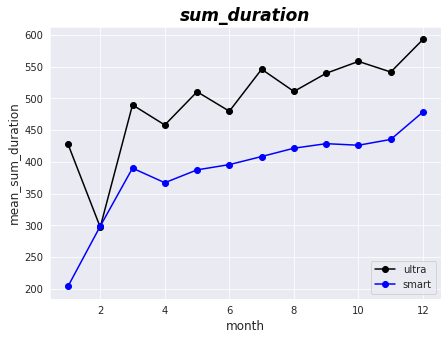

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(7,5))
plt.title("sum_duration", alpha=1, color="k", fontsize=17, fontstyle="italic", fontweight="bold", linespacing=10)
plt.xlabel("month",fontsize=12)
plt.ylabel("mean_sum_duration",fontsize=12)
plt.plot(data_revenue[data_revenue["tariff_name"] == "ultra"].pivot_table(index='month', values='sum_duration', aggfunc='mean'), '-ok')
plt.plot(data_revenue[data_revenue["tariff_name"] == "smart"].pivot_table(index='month', values='sum_duration', aggfunc='mean'), '-ob')
plt.legend(['ultra', 'smart'],loc=4,)
plt.grid('m')#Построение графика для анализа телефонных разговоров

На графике видно, что общая тенденция телефонных разговоров ведет к росту для обоих тарифов. Самая большая разница между тарифами в январе. Во втором месяце среднее продолжительности звонков примерно одинакова. 
<br>Добавим для наглядности к данному графику линии с суммой минут, которые включены в тарифные планы.

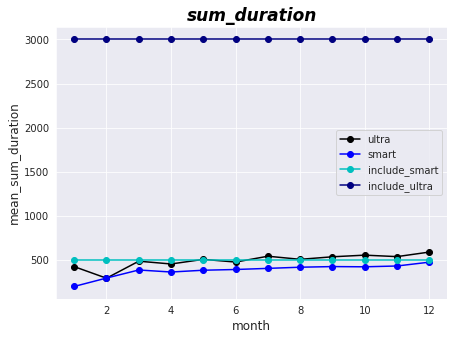

In [ ]:
plt.figure(figsize=(7,5))
plt.title("sum_duration", alpha=1, color="k", fontsize=17, fontstyle="italic", fontweight="bold", linespacing=10)
plt.xlabel("month",fontsize=12)
plt.ylabel("mean_sum_duration",fontsize=12)
plt.plot(data_revenue[data_revenue["tariff_name"] == "ultra"].pivot_table(index='month', values='sum_duration', aggfunc='mean'), '-ok')
plt.plot(data_revenue[data_revenue["tariff_name"] == "smart"].pivot_table(index='month', values='sum_duration', aggfunc='mean'), '-ob')
plt.plot(data_revenue[data_revenue["tariff_name"] == "smart"].pivot_table(index='month', values='minutes_included', aggfunc='mean'), '-oc')
plt.plot(data_revenue[data_revenue["tariff_name"] == "ultra"].pivot_table(index='month', values='minutes_included', aggfunc='mean'), '-o',color = 'navy')
plt.legend(['ultra', 'smart','include_smart','include_ultra'],loc=5,)
plt.grid('m') #Построение графика для анализа телефонных разговоров


На графике видно, что по средним значениям нет превышений включенных в тариф лимитов по минутам. 

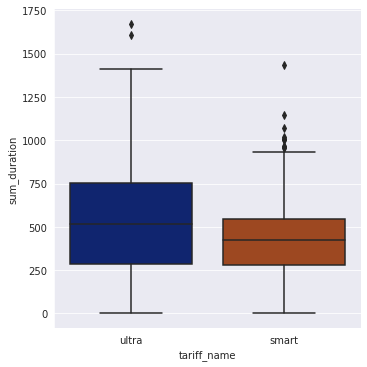

In [ ]:
sns.catplot(x="tariff_name", y = 'sum_duration', kind="box", data=data_revenue, palette ='dark')
plt.show()
#Диаграмма размаха

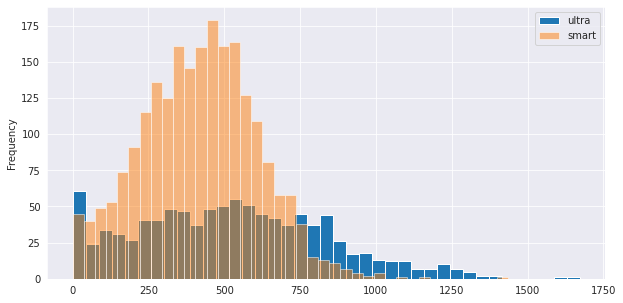

In [ ]:
data_revenue.query('tariff_name == "ultra"')['sum_duration'].plot(bins=39, kind='hist', figsize=(15, 5), label='_smart',alpha=1)
data_revenue.query('tariff_name == "smart"')['sum_duration'].plot(bins=39, kind='hist', figsize=(10, 5), label='_smart', alpha=0.5)
plt.legend(['ultra', 'smart'])
plt.show()

На диаграммах размаха видно, что по звонкам выбросы в основном бывают в тарифе **«Смарт»**, видимо не всем хватает включенных в него лимитов по звонкам, но в общем медианное значение в тарифе **«Ультра»** больше, чем  в **«Смарт»** и составляет 518 минут, против 422 минут у **«Смарт»**-а. Средние значения 418 для тарифа **«Смарт»** и 527 для тарифа **«Ультра»**.Стандартное отклонение и дисперсия по тарифу **«Смарт»** составили 190 и 36219 соответственно, по тарифу **«Ультра»** 318 и 100874. 
<br> На гистограмме мы видим, что данные по звонкам пользователей по тарифу **«Смарт»** имеют скошенность влево. По тарифу **«Ультра»** так же имеется отрицательная скошенность, но менее вырашенная. Данные по тарифу **«Ультра»** имеют более выраженый хвост в районе, остальные данные имеют более однородное распределение.
<br> Рассмотрим интернет-трафик.

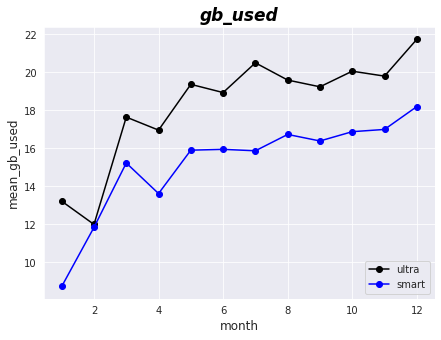

In [ ]:
plt.figure(figsize=(7,5))
plt.title("gb_used", alpha=1, color="k", fontsize=17, fontstyle="italic", fontweight="bold", linespacing=10)
plt.xlabel("month",fontsize=12)
plt.ylabel("mean_gb_used",fontsize=12)
plt.plot(data_revenue[data_revenue["tariff_name"] == "ultra"].pivot_table(index='month', values='gb_used', aggfunc='mean'), '-ok')
plt.plot(data_revenue[data_revenue["tariff_name"] == "smart"].pivot_table(index='month', values='gb_used', aggfunc='mean'), '-ob')
plt.legend(['ultra', 'smart'],loc=4,)
plt.grid('m')#Построение графика для анализа  использования интрнет-трафика

Как и в случае со звонками, использование интернета имеет тенденцию к росту по обоим тарифам. Добавим к графику линии с включенными в тариф лимитами интернет-трафика. 

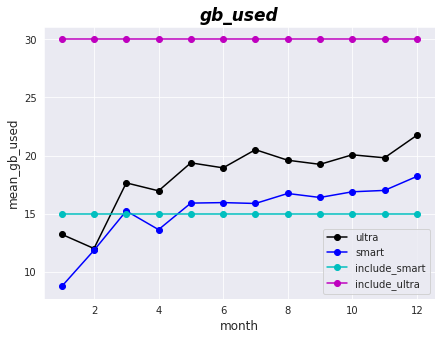

In [ ]:
plt.figure(figsize=(7,5))
plt.title("gb_used", alpha=1, color="k", fontsize=17, fontstyle="italic", fontweight="bold", linespacing=10)
plt.xlabel("month",fontsize=12)
plt.ylabel("mean_gb_used",fontsize=12)
plt.plot(data_revenue[data_revenue["tariff_name"] == "ultra"].pivot_table(index='month', values='gb_used', aggfunc='mean'), '-ok')
plt.plot(data_revenue[data_revenue["tariff_name"] == "smart"].pivot_table(index='month', values='gb_used', aggfunc='mean'), '-ob')
plt.plot(data_revenue[data_revenue["tariff_name"] == "smart"].pivot_table(index='month', values='gb_per_month_included', aggfunc='mean'), '-oc')
plt.plot(data_revenue[data_revenue["tariff_name"] == "ultra"].pivot_table(index='month', values='gb_per_month_included', aggfunc='mean'), '-om')

plt.legend(['ultra', 'smart','include_smart','include_ultra'],loc=4,)
plt.grid('m')#Построение графика для анализа  использования интрнет-трафика

По тарифу **«Смарт»** почти весь год пользователи использую больше трафика, чем предоставляет им тариф. По тарифу **«Ультра»** превышений нет.

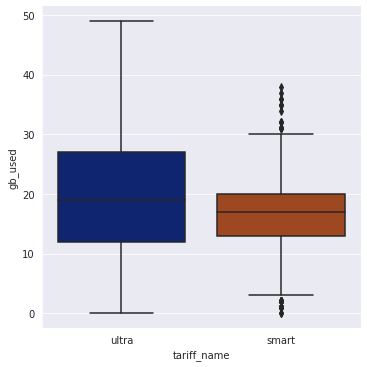

In [ ]:
sns.catplot(x="tariff_name", y = 'gb_used', kind="box", data=data_revenue,palette ='dark')
# диаграмма размаха
plt.show()

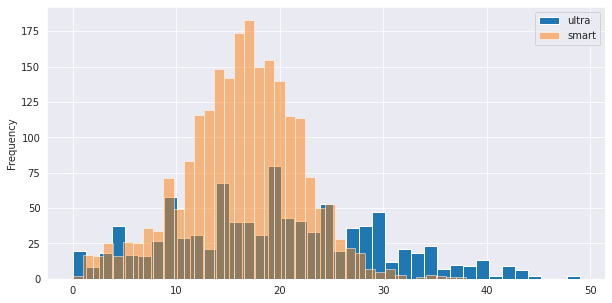

In [ ]:
data_revenue.query('tariff_name == "ultra"')['gb_used'].plot(bins=39, kind='hist', figsize=(15, 5), label='_ultra',alpha=1)
data_revenue.query('tariff_name == "smart"')['gb_used'].plot(bins=39, kind='hist', figsize=(10, 5), label='_smart', alpha=0.5)
plt.legend(['ultra', 'smart'])
plt.show()

На диаграмме размаха видно, что выбросы есть только по тарифу **«Смарт»**, что подтверждает то, что включенного в тариф интернет-лимита не хватает пользователям. Средние для Интернет-трафика тарифа **«Ультра»** составляет 19,5 Гб, а медиана 19 Гб. Разница совсем не большая. Для тарифа **«Смарт»** среднее и медиана составили 16.3 и 17.0 соответственно(при включенных в тариф 15 Гб). Дисперсия и стандартное отклонение для тарифа **«Ультра»** равны 97.1 и 9.9,  а для тарифа **«Смарт»** 33 и 5.8.
<br> Благодаря гистограмме, мы видим, что распределение информации по изпользованным Гигабайтам трафика в тарифе **«Смарт»** имеет норальное распределение, возможно, с небольшим отрицательным скосом. По тарифу **«Ультра»** мы можем наблюдать *Мультимодальность*, т.е. мы видим несколько явных пиков и впадин по гистограмме.
<br> Приступим к анализу среднего количества СМС-сообщений.

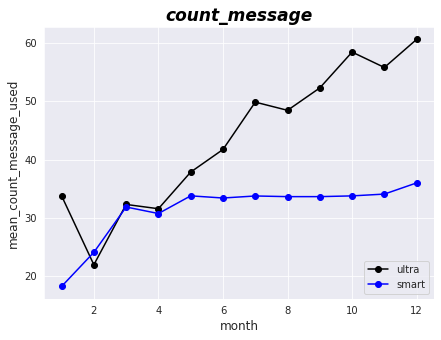

In [ ]:
plt.figure(figsize=(7,5))
plt.title("count_message", alpha=1, color="k", fontsize=17, fontstyle="italic", fontweight="bold", linespacing=10)
plt.xlabel("month",fontsize=12)
plt.ylabel("mean_count_message_used",fontsize=12)
plt.plot(data_revenue[data_revenue["tariff_name"] == "ultra"].pivot_table(index='month', values='count_message', aggfunc='mean'), '-ok')
plt.plot(data_revenue[data_revenue["tariff_name"] == "smart"].pivot_table(index='month', values='count_message', aggfunc='mean'), '-ob')
plt.legend(['ultra', 'smart'],loc=4,)
plt.grid('m') #Построение графика для анализа смс-сообщений

Как и в случае с интернетом и звонками, СМС-сообщения имеют тенденцию роста средних значений, не смотря на то, что СМС-сообщения уже не так популярны как были раньше. При этом для тарифа **«Ультра»** рост более крутой, чем по тарифу **«Смарт»** и начинается он с Апреля месяца. Добавим к графику линии с обозначением границ лимита по тарифным планам оператора.

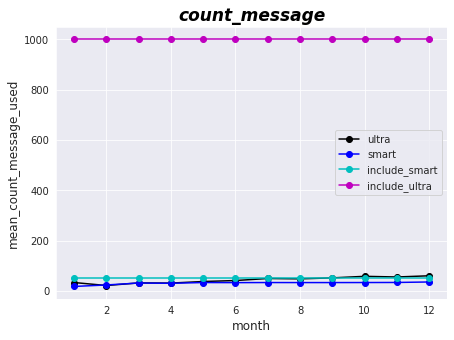

In [ ]:
plt.figure(figsize=(7,5))
plt.title("count_message", alpha=1, color="k", fontsize=17, fontstyle="italic", fontweight="bold", linespacing=10)
plt.xlabel("month",fontsize=12)
plt.ylabel("mean_count_message_used",fontsize=12)
plt.plot(data_revenue[data_revenue["tariff_name"] == "ultra"].pivot_table(index='month', values='count_message', aggfunc='mean'), '-ok')
plt.plot(data_revenue[data_revenue["tariff_name"] == "smart"].pivot_table(index='month', values='count_message', aggfunc='mean'), '-ob')
plt.plot(data_revenue[data_revenue["tariff_name"] == "smart"].pivot_table(index='month', values='messages_included', aggfunc='mean'), '-oc')
plt.plot(data_revenue[data_revenue["tariff_name"] == "ultra"].pivot_table(index='month', values='messages_included', aggfunc='mean'), '-om')

plt.legend(['ultra', 'smart','include_smart','include_ultra'],loc=5)
plt.grid('m') #Построение графика для анализа смс-сообщений

Средние значения по отправке СМС-сообщений как в тарифе **«Смарт»**, так и **«Ультра»** не превышают предоставленные лимиты. Посмотрим, что покажет нам диаграмма размаха.

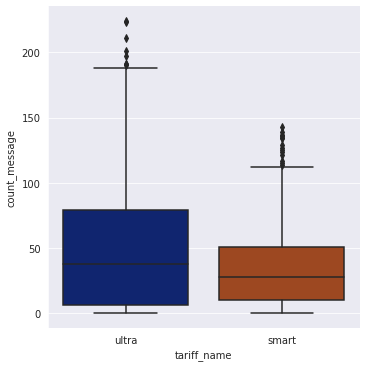

In [ ]:
sns.catplot(x="tariff_name", y = 'count_message', kind="box", data=data_revenue,palette ='dark')
plt.show()

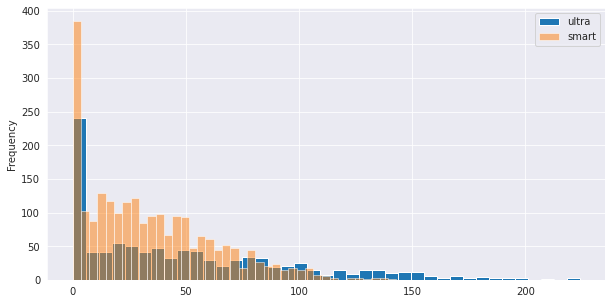

In [ ]:
data_revenue.query('tariff_name == "ultra"')['count_message'].plot(bins=39, kind='hist', figsize=(15, 5), label='_smart',alpha=1)
data_revenue.query('tariff_name == "smart"')['count_message'].plot(bins=39, kind='hist', figsize=(10, 5), label='_ultra', alpha=0.5)
plt.legend(['ultra', 'smart'])
plt.show()

Медианные значения тарифов **«Ультра»** и **«Смарт»** составляют 38 и 28 соответственно. На диаграмме видно, что имеются выбросы, особенно их много в тарифе **«Смарт»**, где бесплатно предоставлено только 50 СМС в месяц. Среднее значение в тарифе **«Ультра»** составляет 49.4, а стандартное отклонение и дисперсия равны 47.8 и 2285.3. Для тарифа **«Смарт»** среднее равно 33.4, а стандартное отклонение и дисперсия 28.2 и 796.8.
<br> По гистограмме, мы видим что для обоих тарифов имеется пик в значении ноль. Смс пользуются кже не так часто. Далее по обоим тарифам гистограмма идет на спад.

### Вывод

В общем использование услуг оператора имеет тенденцию к росту в течении всего года, кроме Февраля месяца, возможно малое количество дней в Феврале дает небольшую просадку. Больше пользователей у тарифа **«Смарт»**, скорее всего из-за того, что фиксированная цена на этот тариф намного меньше, чем у тарифа **«Ультра»**, однако и превышение лимитов у тарифа **«Смарт»** намного больше, что ведет к дополнительным затратам на услуги сверх-лимита. <br>Найденные нами дисперсии и стандартное отклонение по тарифу **«Ультра»** гораздо больше, чем  у тарифа **«Смарт»**. Возможно, при включении в фиксированный пакет большого количества СМС, звонков и Интернет-трафика пользователям тарифа **«Ультра»** дает большую свободу для действий, когда маленькие лимиты тарифа **«Смарт»** заставляют думать о каждом совершенном действии.

 ## Проверка гипотез

### Гипотеза №1: Средняя выручка тарифов «Ультра» и «Смарт» равна.

Сформулируем гипотезы о равенстве средней выручки по тарифам оператора. 
Из-за того, что нулевая гипотеза H₀ всегда формулируется так, чтобы использовать знак равенства, *H₀* будет звучать так:
 - Средняя выручка тарифов **«Ультра»** и **«Смарт»** равна.
<br>*H₁*  будет звучать иначе:
 - Средняя выручка тарифов **«Ультра»** и **«Смарт»**  не равна.
Зададим критический уровень статистической значимости в 0,025, а так как количество пользователей тарифов различается, применим параметр `equal_var = False`.

In [ ]:
ultra = data_revenue.query('tariff_name == "ultra"')['total_price'] 
#создание  среза для тарифа Ультра
smart = data_revenue.query('tariff_name == "smart"')['total_price']
#создание  среза для тарифа Смарт
alpha = .025 #критический уровень статистической значимости
results = st.ttest_ind(
    ultra, 
    smart,equal_var = False)#проверяем гипотезу о равенстве средних двух совокупностей
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу") 
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Итак, мы отвергаем нулевую теорию, выведем средние значения выручки по тарифам и сравним их визуально.

In [ ]:
data_revenue.pivot_table(index='tariff_name', values='total_price', 
                    aggfunc=[np.mean, np.median, np.var, np.std])


,mean,median,var,std
,total_price,total_price,total_price,total_price
tariff_name,,,,
smart,"1,289.97",1023,"669,785.71",818.40
ultra,"2,070.15",1950,"141,516.75",376.19


Мы видим, что средняя выручка по тарифу **«Ультра»** больше, чем по тарифу **«Смарт»** и составляет 2070, против 1290.

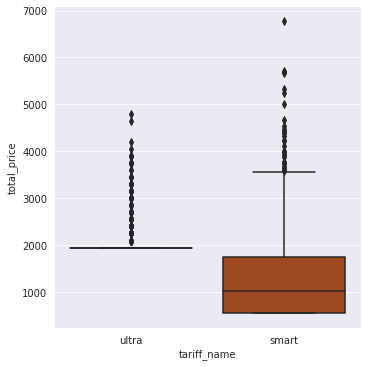

In [ ]:
sns.catplot(x="tariff_name", y = 'total_price', kind="box", data=data_revenue, palette ='dark')
plt.show()

На диаграмме мы видим, что по тарифу **«Ультра»** отклонения от фиксированной цены по тарифу минимальны, имеются некоторые выбросы до 5 000. По тарифу **«Смарт»** разброс более велик и так же имеются выбросы до 6 000.

### Гипотеза №2: Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

Сформулируем гипотезы о равенстве средней выручки клиентов оператора в городе Москва и прочих регионах. 
*H₀* будет звучать так:
 - Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.
<br>*H₁*  будет звучать иначе:
 - Средняя выручка пользователей из Москвы  не равна выручке пользователей из других регионов.
Зададим критический уровень статистической значимости в 0,025.

In [ ]:
moscow = data_revenue.query('city == "Москва"')['total_price']
#создание  среза для МСК
other_city = data_revenue.query('city != "Москва"')['total_price']
#создание  среза для прочих регионов
alpha = .025 #критический уровень статистической значимости
results = st.ttest_ind(
    moscow, 
    other_city)#проверяем гипотезу о равенстве средних двух совокупностей
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть не удалось. P-значение составило 54%, что значительно выше 2,5%, которые мы использовали для определения уровня критической значимости. Это значит, что средняя выручка по Москве статистически значимо не отличается от средней выручки по другим регионам. Посмотрим наглядно среднюю выручку по городу Москва и другим городам. Для этого создадим функцию, которая добавит столбец с группировкой по городу.

In [ ]:
def city(i): #создание функции
    if i == 'Москва': 
        return 'Москва'
    else: 
        return 'Другие города'
data_revenue['group_city'] = data_revenue['city'].apply(city)

city_stst = data_revenue.pivot_table(index=['group_city'], values='total_price', 
                    aggfunc= [np.mean, np.median, np.var, np.std])#создание сводной таблицы
city_stst #вывод на экран

,mean,median,var,std
,total_price,total_price,total_price,total_price
group_city,,,,
Другие города,"1,524.94",1583,"654,137.63",808.79
Москва,"1,546.71",1750,"565,636.47",752.09


Итак, мы видим, что средние значения выручки по группировке по Москве и прочим городам и правда не сильно различаются, буквально в 22 рубля. 

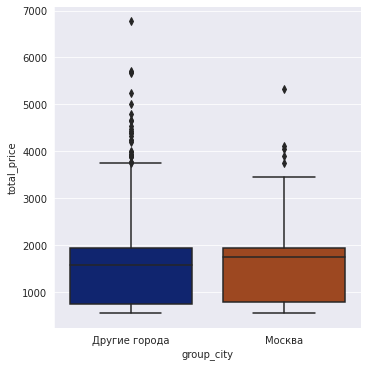

In [ ]:
sns.catplot(x="group_city", y = 'total_price', kind="box", data=data_revenue, palette ='dark')
plt.show()

Медиана по городу Москва немного больше, чем в других городах, однако выбросы в регионах встречаются чаще.

## Вывод

По общим результатам анализа можно выделить несколько пунктов, которые хотелось бы отметить.
 - Прослеживаются тенденции к росту по всем услугам и тарифам оператора.
 - Лимиты тарифа **«Смарт»** довольно малы, и пользователям не хватает их для комфортного использования.
 - Средняя выручка тарифов **«Ультра»** и **«Смарт»**  не равны. У тарифа **«Ультра»** она больше и составляет 2070 руб.
 - Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.
<br>Исходя из некоторых выводов, сделанных выше, я бы порекомендовала оператору, возможно, разработать новый, промежуточный, тариф. Это поможет имеющимся клиентам почувствовать себя более комфортно и возможно, привлечет новых клиентов.